# HW 0 - Notebook

**This homework is ready to submit when you can run "Kernel > Restart & Run All" with no errors.**

## pandas
Pandas is a library for working with row/column data like like you would in a spreadsheet. In some cases, it's easier than using the standard csv library

In [1]:
import pandas
import time

In [2]:
print(time.asctime())

df = pandas.read_csv('../data/Orchset - Predominant Melodic Instruments.csv')
df

Fri Jan 29 13:32:15 2021


excerpt  \
0               Beethoven-S3-I-ex1.wav   
1               Beethoven-S3-I-ex2.wav   
2               Beethoven-S3-I-ex3.wav   
3               Beethoven-S3-I-ex5.wav   
4               Beethoven-S3-I-ex6.wav   
..                                 ...   
59          Strauss-BlueDanube-ex2.wav   
60          Strauss-BlueDanube-ex3.wav   
61  Tchaikovsky-SwanLake-Scene-ex1.wav   
62  Tchaikovsky-SwanLake-Scene-ex2.wav   
63      Wagner-Tannhauser-Act2-ex2.wav   

   Predominant melodic instrument(s) description  Alternating  \
0                                  strings+winds         True   
1                                  strings+winds         True   
2                                        strings        False   
3                                   string+winds         True   
4                                   string+winds         True   
..                                           ...          ...   
59                                 strings+winds         True   
60                           winds+brass+strings        False   
61                                         Brass        False   
62                                       strings        False   
63                                       strings        False   

    containsstrings  containswinds  containsbrass  Onlystrings  Onlywinds  \
0              True           True          False        False      False   
1              True           True          False        False      False   
2              True          False          False         True      False   
3              True           True          False        False      False   
4              True           True          False        False      False   
..              ...            ...            ...          ...        ...   
59             True           True          False        False      False   
60             True           True           True        False      False   
61            False          False           True        False      False   
62             True          False          False         True      False   
63             True          False          False         True      False   

    Onlybrass  
0       False  
1       False  
2       False  
3       False  
4       False  
..        ...  
59      False  
60      False  
61       True  
62      False  
63      False  

[64 rows x 9 columns]

## numpy
Use numpy to do math

In [3]:
import numpy as np

In [4]:
print(time.asctime())

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print("a={}\nb={}".format(a, b))
a_dot_b = np.dot(a, b)
print("The scalar product of a and b is {}".format(a_dot_b))
a_times_b = np.multiply(a, b)
print("The pointwise product of a and b is {}".format(a_times_b))

c = np.array([[1, 2], [3, 4]])
d = np.array([[-1, 1], [1, -1]])
print("c={}\nd={}".format(c, d))
c_times_d = np.multiply(c, d)
print("The pointwise product of c and d is {}".format(c_times_d))
c_mult_d = np.matmul(c, d)
print("Matrix multiplication of c and d: {}".format(c_mult_d))

Fri Jan 29 13:32:19 2021
a=[1 2 3]
b=[4 5 6]
The scalar product of a and b is 32
The pointwise product of a and b is [ 4 10 18]
c=[[1 2]
 [3 4]]
d=[[-1  1]
 [ 1 -1]]
The pointwise product of c and d is [[-1  2]
 [ 3 -4]]
Matrix multiplication of c and d: [[ 1 -1]
 [ 1 -1]]


## matplotlib
matplotlib is a library for making plots

In [5]:
import matplotlib.pyplot as plt

## This line is specific to notebooks and lets you plot directly in the notebook.
%matplotlib inline

In [6]:
x = np.array([-4, -1, 0, 1, 4])
y = np.array([16, 1, 0, 1, 16])

Fri Jan 29 13:32:23 2021


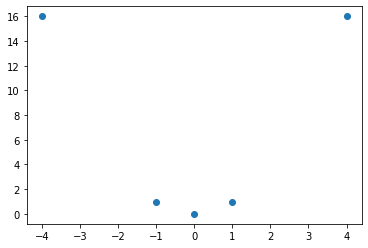

In [7]:
print(time.asctime())

plt.plot(x, y, 'o')
plt.show()

## scipy
If you can't find what you want in numpy it's probably in scipy.

In [8]:
from scipy import interpolate

In [9]:
y_interp_linear = interpolate.interp1d(x, y, kind='linear')
y_interp_quadratic = interpolate.interp1d(x, y, kind='quadratic')

In [10]:
x_new_grid = np.linspace(-4, 4, 100)
y_new_linear = y_interp_linear(x_new_grid)
y_new_quadratic = y_interp_quadratic(x_new_grid)

Fri Jan 29 13:32:27 2021


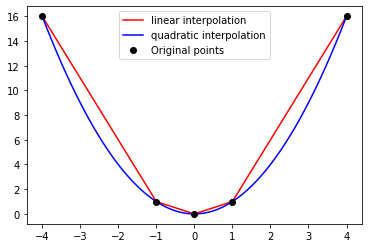

In [11]:
print(time.asctime())

plt.plot(x_new_grid, y_new_linear, '-r', label='linear interpolation')
plt.plot(x_new_grid, y_new_quadratic, '-b', label='quadratic interpolation')
plt.plot(x, y, 'ok', label='Original points')
plt.legend()
plt.show()

## librosa
The most useful library for this class! Tools for audio and music processing.

In [12]:
import librosa

# this library lets us display audio directly in a notebook
import IPython.display as ipd

In [13]:
audio_path = "../data/Beethoven-S3-I-ex1.wav"
audio_signal, sr = librosa.load(audio_path, sr=None, mono=True, duration=10)

In [14]:
ipd.Audio(audio_signal, rate=sr)

In [15]:
times_audio = librosa.samples_to_time(np.arange(len(audio_signal)), sr)

In [16]:
S = np.abs(librosa.stft(audio_signal, n_fft=1024))
freqs_stft = librosa.fft_frequencies(sr=sr, n_fft=1024)
times_stft = librosa.frames_to_time(np.arange(S.shape[1]), sr=sr)

Fri Jan 29 13:32:51 2021


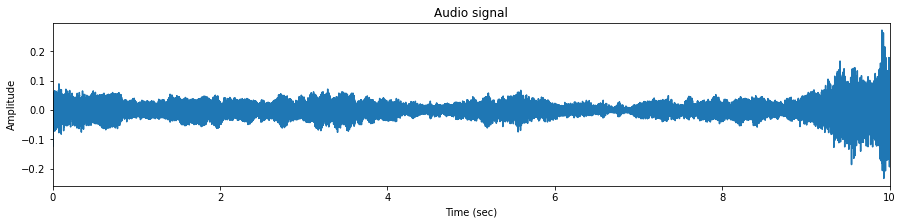

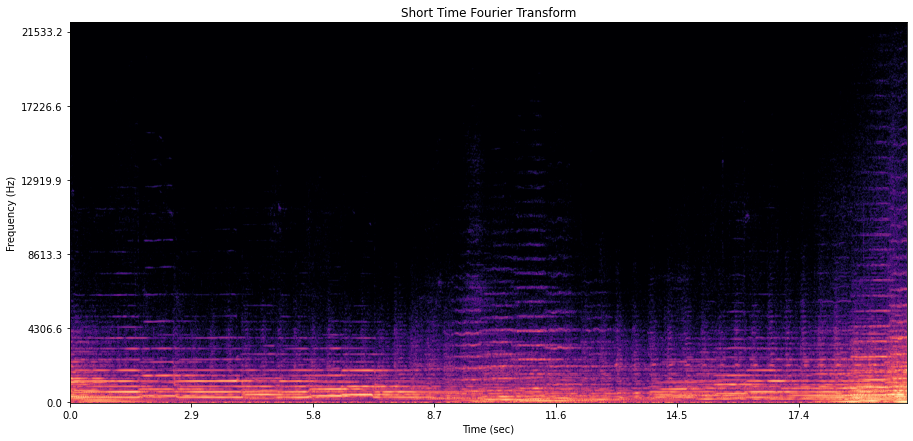

In [17]:
print(time.asctime())

plt.figure(figsize=(15, 3))

plt.title("Audio signal")
plt.plot(times_audio, audio_signal)
plt.xlim([0, 10])
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=(15, 7))
plt.title("Short Time Fourier Transform")
plt.imshow(librosa.amplitude_to_db(S), origin='lower', cmap='magma')
plt.xticks(np.arange(len(times_stft))[::250], np.round(times_stft[::250], 1))
plt.yticks(np.arange(len(freqs_stft))[::100], np.round(freqs_stft[::100], 1))
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.axis('tight')
plt.show()

## mirdata
mirdata is a library with loaders and download utilities for some common MIR datasets

In [18]:
import mirdata

In [19]:
orchset = mirdata.initialize('orchset')
orchset.download()  # download the dataset
orchset.validate()  # validate that all the expected files are there

INFO: Downloading ['all'] to /tmp\mir_datasets\orchset
INFO: [all] downloading Orchset_dataset_0.zip
INFO: /tmp\mir_datasets\orchset\Orchset_dataset_0.zip already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.
INFO: /tmp\mir_datasets\orchset\audio already exists. Run with force_overwrite=True to download from scratch
INFO: /tmp\mir_datasets\orchset\GT already exists. Run with force_overwrite=True to download from scratch
INFO: /tmp\mir_datasets\orchset\midi already exists. Run with force_overwrite=True to download from scratch
INFO: /tmp\mir_datasets\orchset\Orchset - Predominant Melodic Instruments.csv already exists. Run with force_overwrite=True to download from scratch
INFO: /tmp\mir_datasets\orchset\README.txt already exists. Run with force_overwrite=True to download from scratch
100%|██████████| 64/64 [00:02<00:00, 26.26it/s]

Success: the dataset is complete and all files are valid.
--------------------


({'metadata': {}, 'tracks': {}}, {'metadata': {}, 'tracks': {}})

In [20]:
print(time.asctime())

example_track_id = "Beethoven-S3-I-ex1"

example_track = orchset.track(example_track_id)
print(example_track)

Fri Jan 29 13:33:06 2021
Track(
  alternating_melody=True,
  audio_path_mono="/tmp\mir_datasets\orchset\audio/mono/Beethoven-S3-I-ex1.wav",
  audio_path_stereo="/tmp\mir_datasets\orchset\audio/stereo/Beethoven-S3-I-ex1.wav",
  composer="Beethoven",
  contains_brass=False,
  contains_strings=True,
  contains_winds=True,
  excerpt="1",
  melody_path="/tmp\mir_datasets\orchset\GT/Beethoven-S3-I-ex1.mel",
  only_brass=False,
  only_strings=False,
  only_winds=False,
  predominant_melodic_instruments=['strings', 'winds'],
  track_id="Beethoven-S3-I-ex1",
  work="S3-I",
  audio_mono: the track's audio (mono)

        Returns,
  audio_stereo: the track's audio (stereo)

        Returns,
  melody: ,
)


In [21]:
y_orchset, sr = example_track.audio_mono
C = np.abs(librosa.cqt(y_orchset, sr=sr, n_bins=24*6, fmin=80, bins_per_octave=24))
freqs_cqt = librosa.cqt_frequencies(n_bins=24*6, fmin=80, bins_per_octave=24)
times_cqt = librosa.frames_to_time(np.arange(C.shape[1]), sr)

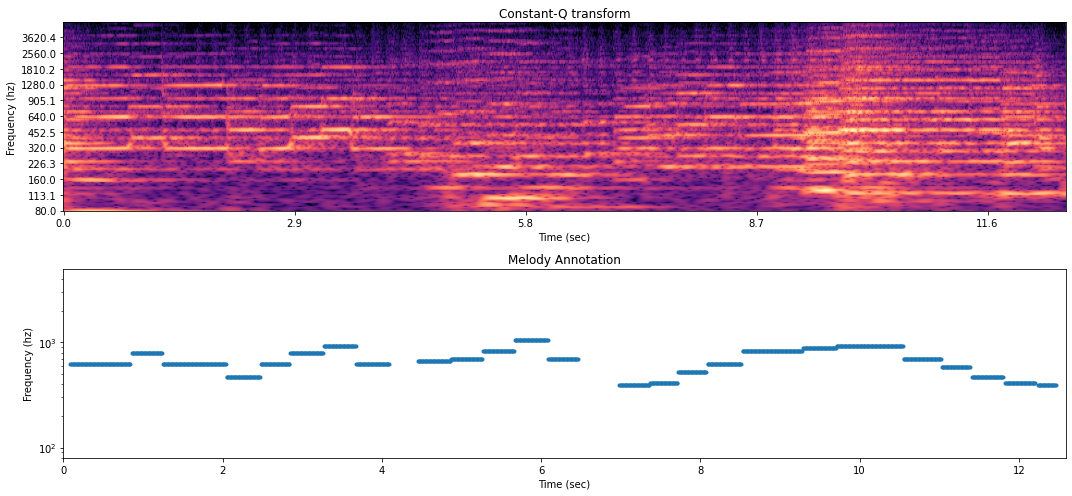

In [22]:
plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.title("Constant-Q transform")
plt.imshow(librosa.amplitude_to_db(C), origin='lower', cmap='magma')
plt.xticks(np.arange(len(times_cqt))[::250], np.round(times_cqt[::250], 1))
plt.yticks(np.arange(len(freqs_cqt))[::12], np.round(freqs_cqt[::12], 1))
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (hz)")
plt.axis('tight')

plt.subplot(2, 1, 2)
plt.title("Melody Annotation")
plt.semilogy(example_track.melody.times, example_track.melody.frequencies, '.')
plt.xlim([0, np.max(times_cqt)])
plt.ylim([np.min(freqs_cqt), np.max(freqs_cqt)])
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (hz)")

plt.tight_layout()

In [23]:
ipd.Audio(y_orchset, rate=sr)

## mir_eval
mir_eval is a library for evaluating the output of systems for common MIR tasks

In [24]:
import mir_eval

In [25]:
def lazy_melody_extractor(audio_path):
    """ A bad algorithm for melody extraction which just returns the frequency value witht the highest CQT amplitude.
    Bins with amplitude below one standard deviation from the mean are set to unvoiced.
    """
    y, sr = librosa.load(audio_path, sr=None)
    C = np.abs(librosa.cqt(y, sr=sr, n_bins=24*6, fmin=80, bins_per_octave=24))
    freqs_cqt = librosa.cqt_frequencies(n_bins=24*6, fmin=80, bins_per_octave=24)
    times_cqt = librosa.frames_to_time(np.arange(C.shape[1]), sr)

    melody_f0_estimate = np.array([freqs_cqt[i] for i in np.argmax(C, axis=0)])
    amplitudes = np.max(C, axis=0)
    threshold = np.mean(amplitudes) - np.std(amplitudes)
    melody_f0_estimate[amplitudes < threshold] = 0
    
    return times_cqt, melody_f0_estimate

In [26]:
# Evaluate on the full dataset (this will take a minute or two)
orchset_scores = {}
orchset_data = orchset.load_tracks()
for track_id, track_data in orchset_data.items():
    est_times, est_freqs = lazy_melody_extractor(track_data.audio_path_mono)

    ref_melody_data = track_data.melody
    ref_times = ref_melody_data.times
    ref_freqs = ref_melody_data.frequencies

    score = mir_eval.melody.evaluate(ref_times, ref_freqs, est_times, est_freqs)
    orchset_scores[track_id] = score

In [27]:
print(time.asctime())

df_orchset = pandas.DataFrame.from_dict(orchset_scores, orient='index')
df_orchset.sort_values("Overall Accuracy")

Fri Jan 29 13:34:05 2021


Voicing Recall  \
Grieg-PeerGynt-MorningMood-ex1                            0.928257   
Smetana-MaVlast-Vltava-ex4                                0.893928   
Musorgski-Ravel-PicturesExhibition-ex6                    0.863891   
Grieg-PeerGynt-HallMountainKing-ex1                       0.865375   
Beethoven-S9-II-ex1                                       0.883650   
...                                                            ...   
Musorgski-Ravel-PicturesExhibition-ex5                    0.948910   
Wagner-Tannhauser-Act2-ex2                                0.992412   
Rimski-Korsakov-Scheherazade-YoungPrincePrinces...        0.861673   
Musorgski-Ravel-PicturesExhibition-ex8                    0.838211   
Holst-ThePlanets-Jupiter-ex3                              0.855422   

                                                    Voicing False Alarm  \
Grieg-PeerGynt-MorningMood-ex1                                 0.909722   
Smetana-MaVlast-Vltava-ex4                                     0.871795   
Musorgski-Ravel-PicturesExhibition-ex6                         0.872881   
Grieg-PeerGynt-HallMountainKing-ex1                            0.943396   
Beethoven-S9-II-ex1                                            0.842105   
...                                                                 ...   
Musorgski-Ravel-PicturesExhibition-ex5                         0.817460   
Wagner-Tannhauser-Act2-ex2                                     0.900000   
Rimski-Korsakov-Scheherazade-YoungPrincePrinces...             0.710526   
Musorgski-Ravel-PicturesExhibition-ex8                         0.490909   
Holst-ThePlanets-Jupiter-ex3                                   0.625000   

                                                    Raw Pitch Accuracy  \
Grieg-PeerGynt-MorningMood-ex1                                0.000000   
Smetana-MaVlast-Vltava-ex4                                    0.004498   
Musorgski-Ravel-PicturesExhibition-ex6                        0.000000   
Grieg-PeerGynt-HallMountainKing-ex1                           0.004968   
Beethoven-S9-II-ex1                                           0.005511   
...                                                                ...   
Musorgski-Ravel-PicturesExhibition-ex5                        0.344687   
Wagner-Tannhauser-Act2-ex2                                    0.339295   
Rimski-Korsakov-Scheherazade-YoungPrincePrinces...            0.359375   
Musorgski-Ravel-PicturesExhibition-ex8                        0.451505   
Holst-ThePlanets-Jupiter-ex3                                  0.471270   

                                                    Raw Chroma Accuracy  \
Grieg-PeerGynt-MorningMood-ex1                                 0.223647   
Smetana-MaVlast-Vltava-ex4                                     0.190405   
Musorgski-Ravel-PicturesExhibition-ex6                         0.292329   
Grieg-PeerGynt-HallMountainKing-ex1                            0.097864   
Beethoven-S9-II-ex1                                            0.093693   
...                                                                 ...   
Musorgski-Ravel-PicturesExhibition-ex5                         0.493188   
Wagner-Tannhauser-Act2-ex2                                     0.569106   
Rimski-Korsakov-Scheherazade-YoungPrincePrinces...             0.414982   
Musorgski-Ravel-PicturesExhibition-ex8                         0.701505   
Holst-ThePlanets-Jupiter-ex3                                   0.691844   

                                                    Overall Accuracy  
Grieg-PeerGynt-MorningMood-ex1                              0.004926  
Smetana-MaVlast-Vltava-ex4                                  0.006280  
Musorgski-Ravel-PicturesExhibition-ex6                      0.006649  
Grieg-PeerGynt-HallMountainKing-ex1                         0.008748  
Beethoven-S9-II-ex1                                         0.010651  
...                                                              ...  
Musorgski-Ravel-Picture

In [28]:
# look at the output for the best and the worst example
best_score_track_id = df_orchset["Overall Accuracy"].idxmax()
worst_score_track_id = df_orchset["Overall Accuracy"].idxmin()

best_score_track = orchset_data[best_score_track_id]
worst_score_track = orchset_data[worst_score_track_id]

best_times, best_freqs = lazy_melody_extractor(best_score_track.audio_path_mono)
worst_times, worst_freqs = lazy_melody_extractor(worst_score_track.audio_path_mono)

In [29]:
# sonify the label and the estimate
y_best_label = mir_eval.sonify.pitch_contour(best_score_track.melody.times, best_score_track.melody.frequencies, 8000)
y_best_estimate = mir_eval.sonify.pitch_contour(best_times, best_freqs, 8000)

In [30]:
# the audio input
ipd.Audio(best_score_track.audio_path_mono)

In [31]:
# the label and estimate, sonified. The label is in the left channel and the estimate on the right
ipd.Audio(np.vstack([y_best_label, y_best_estimate[:len(y_best_label)]]), rate=8000)

Fri Jan 29 13:34:06 2021


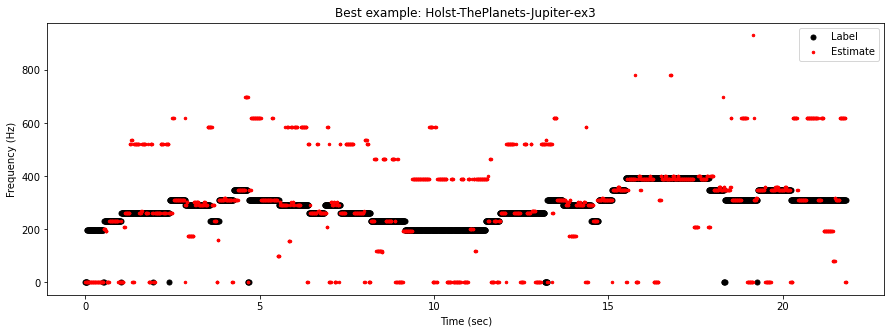

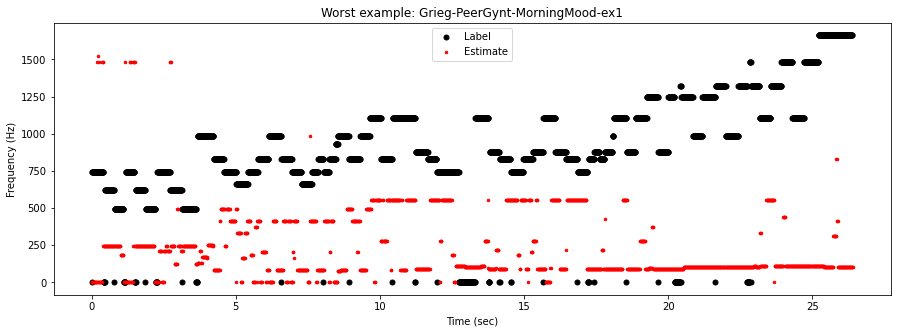

In [32]:
print(time.asctime())

# plot a good example and a bad example
plt.figure(figsize=(15, 5))
plt.title("Best example: {}".format(best_score_track_id))
plt.plot(best_score_track.melody.times, best_score_track.melody.frequencies, '.k', markersize=10, label="Label")
plt.plot(best_times, best_freqs, '.r', markersize=5, label="Estimate")
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.legend()

plt.figure(figsize=(15, 5))
plt.title("Worst example: {}".format(worst_score_track_id))
plt.plot(worst_score_track.melody.times, worst_score_track.melody.frequencies, '.k', markersize=10, label="Label")
plt.plot(worst_times, worst_freqs, '.r', markersize=5, label="Estimate")
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.legend()

## Other packages
Finally, I won't show examples of using all of these here, but the following packages should successfully import

In [33]:
# a library for machine learning
import sklearn
print(time.asctime())

Fri Jan 29 13:34:07 2021


In [34]:
# a library for loading music data in jams format
import jams
print(time.asctime())

Fri Jan 29 13:34:07 2021


In [35]:
# a library with some ready-to-run MIR algorithms
import madmom
print(time.asctime())

Fri Jan 29 13:34:07 2021


In [36]:
print("Congratulations, you made it!")

Congratulations, you made it!


## Acknowledgments
This example notebook was adapted from Rachel Bittner's Music Information Retrieval class at NYU, with permission.